# Matching

### a. Install packages and read in data

In [ ]:
install.packages(c('Matching', 'rgenoud', 'ggplot2', 'cobalt'))

library(Matching)
library(rgenoud)
library(ggplot2)
library(cobalt)

Installing packages into ‘/work/.R/library’
(as ‘lib’ is unspecified)

Warning message in install.packages(c("Matching", "rgenoud", "ggplot2", "cobalt")):
“installation of package ‘Matching’ had non-zero exit status”
Warning message in install.packages(c("Matching", "rgenoud", "ggplot2", "cobalt")):
“installation of package ‘rgenoud’ had non-zero exit status”
Loading required package: MASS

## 
##  Matching (Version 4.10-2, Build Date: 2022-04-13)
##  See http://sekhon.berkeley.edu/matching for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##


##  rgenoud (Version 5.9-0.3, Build Date: 2022-04-19)
##  See http://sekhon.berkeley.edu/rgenoud for additional documentation.
##  Please cite software as:
##   Walter Mebane, Jr. and Jasjeet S. Sekhon. 2011.
##   ``Genetic Optimiza

In [ ]:
df = read.csv('/work/DS4SG-Gender-Inequality/data/processed/skills_certifications_categorized_skill_count.csv')
head(df)

,search_query,name,gender,join_date_from_earliest,location_size,hourly_rate,pay_grade,avg_rating,num_reviews,num_recommendations,⋯,management_skills,marketing_business_skills,performance_arts_skills,design_skills,teaching_training_skills,miscellaneous_skills,language_certifications,freelancer_certifications,general_skill_certifications,programming_certifications
,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,Milen,1,7063,1,45,0,0,0,0,⋯,0,0,0,8,0,1,0,0,0,0
2,2,Jeremy,1,7526,1,90,0,0,0,0,⋯,0,0,0,18,0,0,1,0,0,0
3,2,Nichole,0,6430,0,25,4,5,2,0,⋯,0,2,1,16,0,0,1,0,0,0
4,2,Robert,1,3238,1,75,0,0,0,0,⋯,0,0,0,5,0,0,0,1,0,0
5,2,Jean-Paul,1,6661,5,19,0,0,0,0,⋯,0,0,0,6,0,0,0,0,0,0
6,2,Brianna,0,6272,1,10,0,0,0,0,⋯,0,0,0,3,0,0,0,0,0,0


### b. Randomly sample 1000 data points for testing

In [ ]:
# sample = df[sample(nrow(df), 1000), ]
# head(sample)

### c. Match on variables of interest &amp; calculate treatment effect

In [ ]:
attach(df)

# variables to match on
X <- cbind(join_date_from_earliest, location_size, avg_rating, num_reviews, num_recommendations, pct_jobs_completed, pct_on_budget, pct_on_time, verification_preferred_freelancer, verification_identity_verified, verification_payment_verified, verification_phone_verified, verification_email_verified, verification_facebook_connected, badge_plus_membership, badge_preferred_freelancer, badge_verified, engineering_skills, writing_skills, technical_programming_skills, language_translation_skills, finance_accounting_skills, management_skills, marketing_business_skills, performance_arts_skills, design_skills, teaching_training_skills, miscellaneous_skills, language_certifications, freelancer_certifications, general_skill_certifications, programming_certifications)

# find optimal weights with GenMatch, probably want to tweak pop.size etc., do we want ATE or ATT?
genout <- GenMatch(X=X, Tr=gender, estimand="ATE", M=1, pop.size=64, max.generations=20, wait.generations=4, caliper=0.25)



Fri Apr 22 00:38:55 2022
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 
 0.000000e+00   <=  X2   <=    1.000000e+03 
 0.000000e+00   <=  X3   <=    1.000000e+03 
 0.000000e+00   <=  X4   <=    1.000000e+03 
 0.000000e+00   <=  X5   <=    1.000000e+03 
 0.000000e+00   <=  X6   <=    1.000000e+03 
 0.000000e+00   <=  X7   <=    1.000000e+03 
 0.000000e+00   <=  X8   <=    1.000000e+03 
 0.000000e+00   <=  X9   <=    1.000000e+03 
 0.000000e+00   <=  X10  <=    1.000000e+03 
 0.000000e+00   <=  X11  <=    1.000000e+03 
 0.000000e+00   <=  X12  <=    1.000000e+03 
 0.000000e+00   <=  X13  <=    1.000000e+03 
 0.000000e+00   <=  X14  <=    1.000000e+03 
 0.000000e+00   <=  X15  <=    1.000000e+03 
 0.000000e+00   <=  X16  <=    1.000000e+03 
 0.000000e+00   <=  X17  <=    1.000000e+03 
 0.000000e+00   <=  X18  <=    1.000000e+03 
 0.000000e+00   <=  X19  <=    1.000000e+03 
 0.000000e+00   <=  X20  <=    1.000000e+03 
 0.000000e+00   <=  X21  <=    1.000000e+03 
 0.000000e+00   <= 

In [ ]:
# estimate causal effect using weights
mout <- Match(X=X, Y=hourly_rate, Tr=gender, Weight.matrix=genout)
summary(mout)


Estimate...  4.6175 
AI SE......  1.2804 
T-stat.....  3.6064 
p.val......  0.0003105 

Original number of observations..............  9766 
Original number of treated obs...............  6692 
Matched number of observations...............  6692 
Matched number of observations  (unweighted).  7025 



In [ ]:
# check balance on variables of interest
mb <- MatchBalance(gender ~ join_date_from_earliest + location_size + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified + engineering_skills + writing_skills + technical_programming_skills + language_translation_skills + finance_accounting_skills + management_skills + marketing_business_skills + performance_arts_skills + design_skills + teaching_training_skills + miscellaneous_skills + language_certifications + freelancer_certifications + general_skill_certifications + programming_certifications, match.out=mout, nboots=1000)


***** (V1) join_date_from_earliest *****
                       Before Matching 	 	 After Matching
mean treatment........     6212.8 	 	     6212.8 
mean control..........     6632.3 	 	     6391.2 
std mean diff.........    -28.603 	 	    -12.163 

mean raw eQQ diff.....     420.52 	 	     171.66 
med  raw eQQ diff.....        402 	 	        140 
max  raw eQQ diff.....       1627 	 	       1247 

mean eCDF diff........   0.086589 	 	    0.03032 
med  eCDF diff........   0.097927 	 	   0.031815 
max  eCDF diff........    0.12597 	 	   0.053381 

var ratio (Tr/Co).....     1.6712 	 	     1.3004 
T-test p-value........ < 2.22e-16 	 	 < 2.22e-16 
KS Bootstrap p-value.. < 2.22e-16 	 	 < 2.22e-16 
KS Naive p-value...... < 2.22e-16 	 	 4.0496e-09 
KS Statistic..........    0.12597 	 	   0.053381 


***** (V2) location_size *****
                       Before Matching 	 	 After Matching
mean treatment........     1.9105 	 	     1.9105 
mean control..........     1.9424 	 	     1.7878 
std me

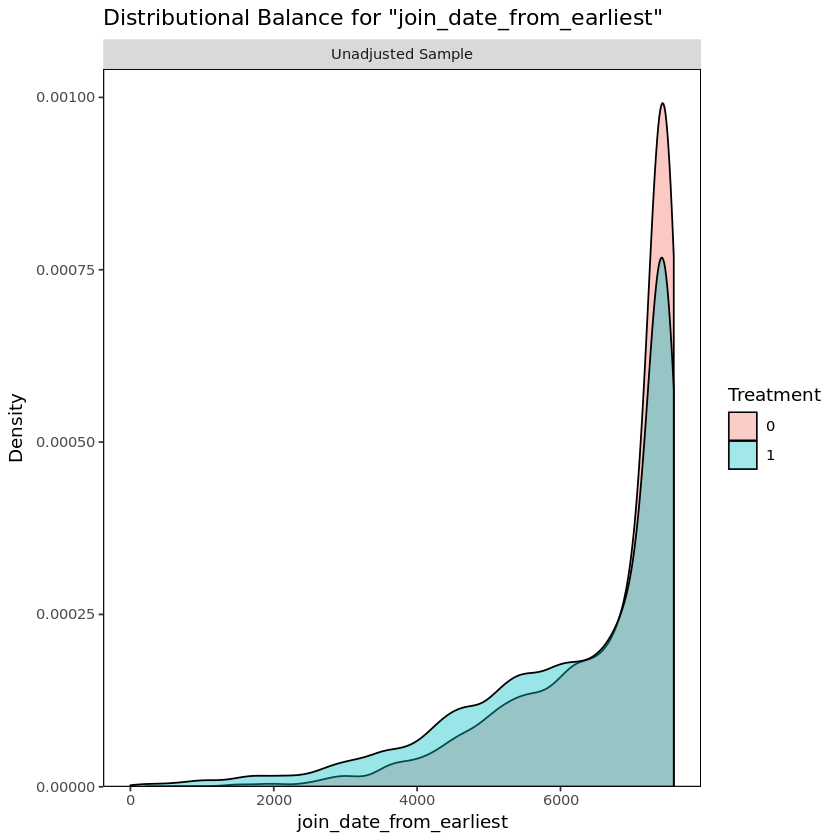

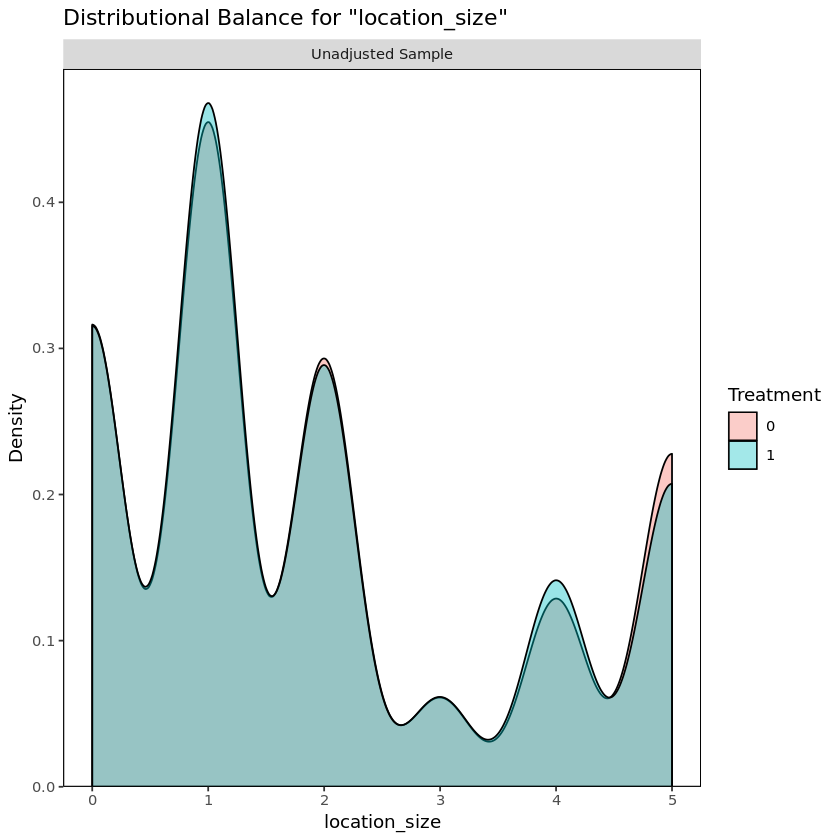

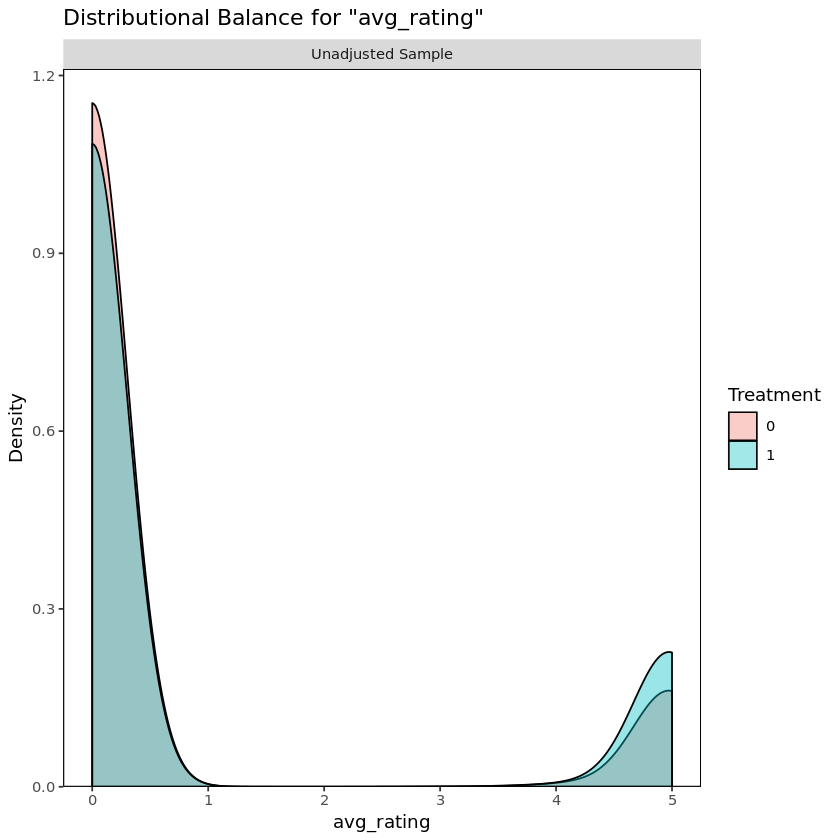

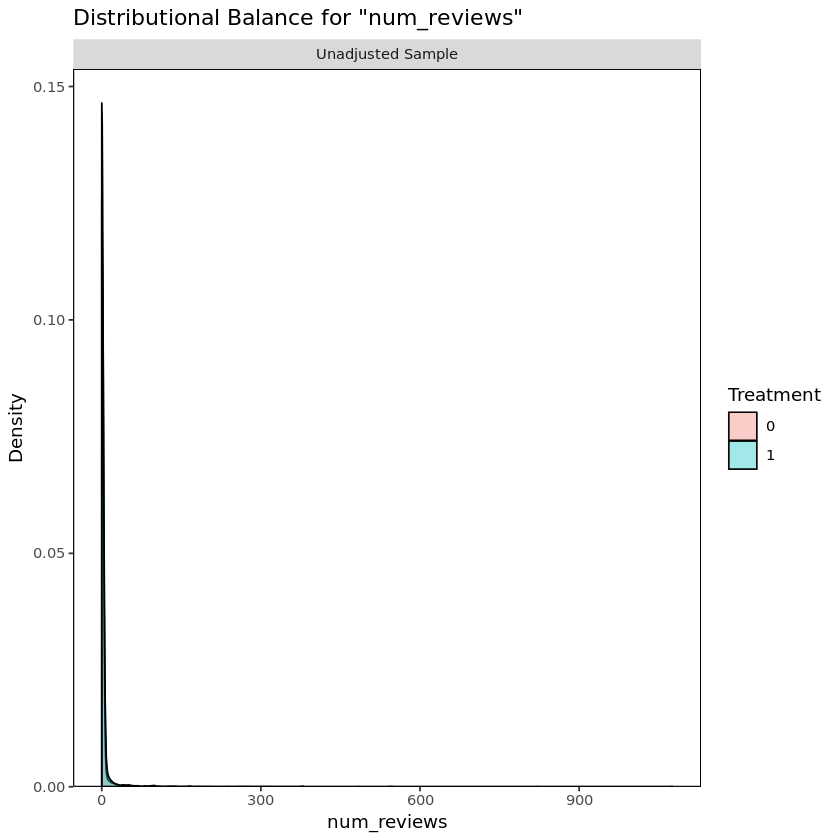

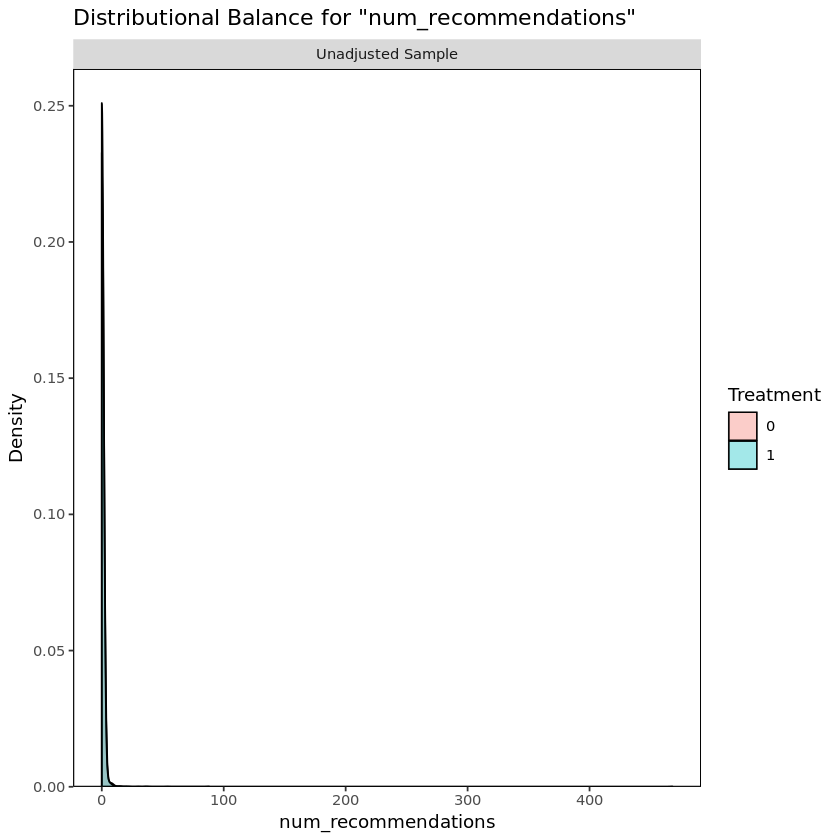

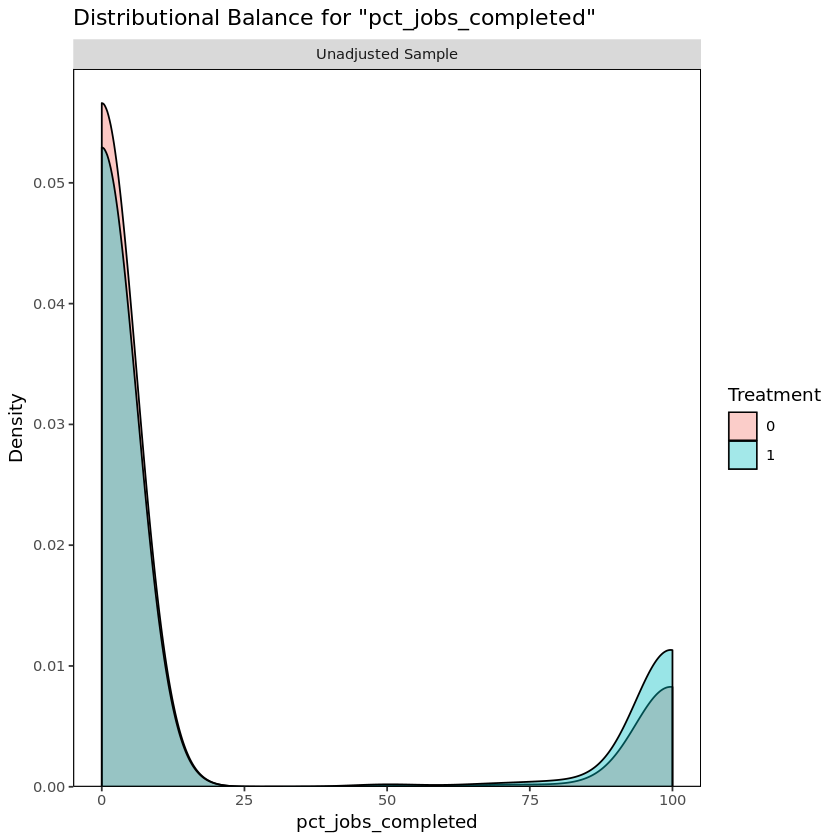

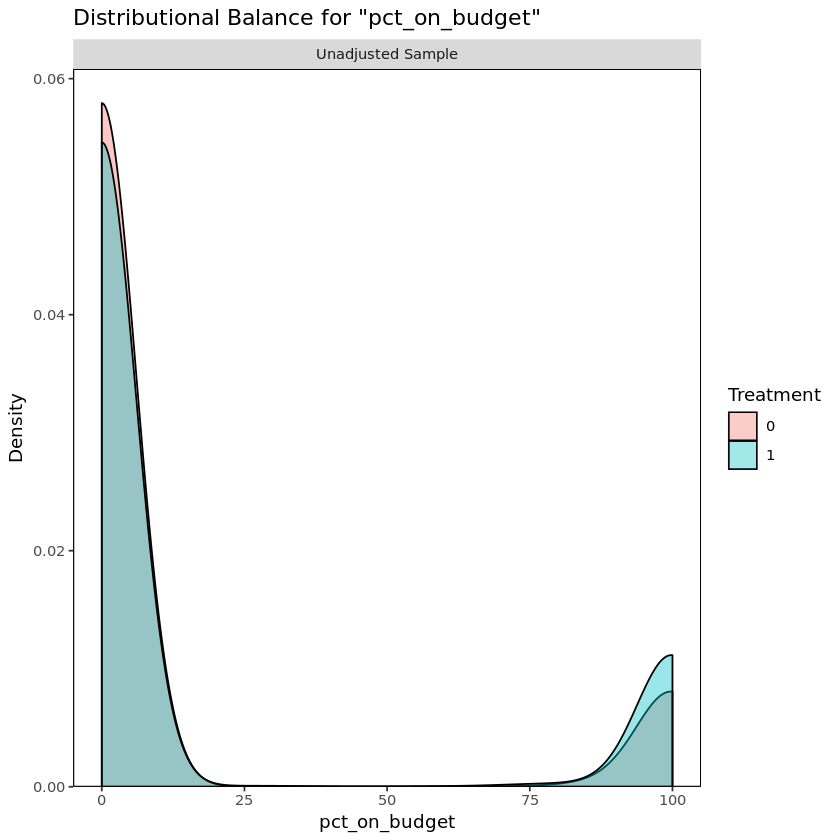

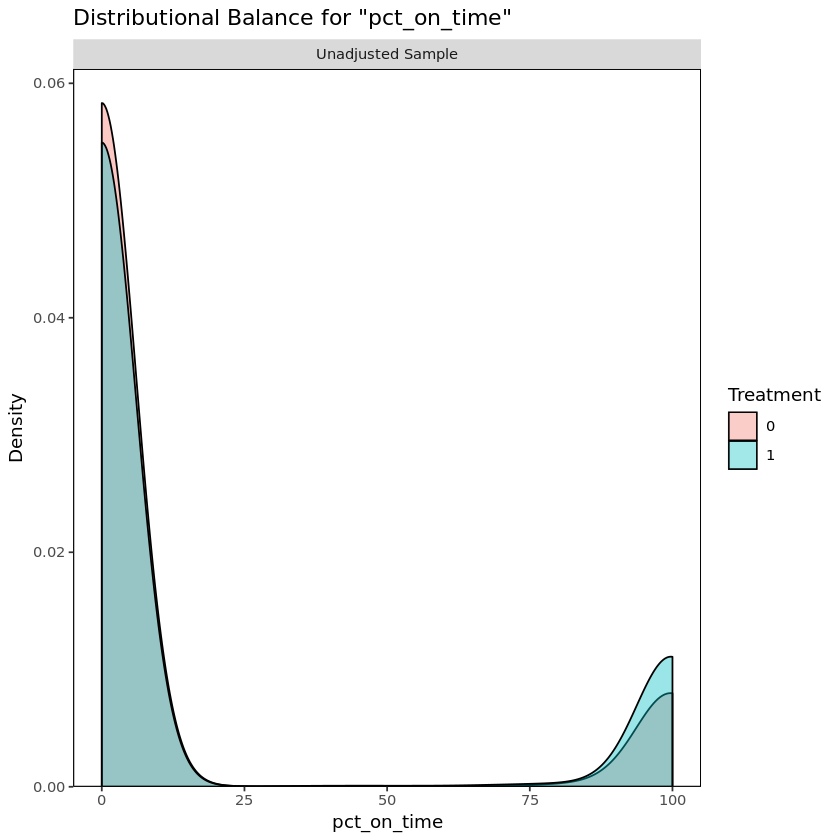

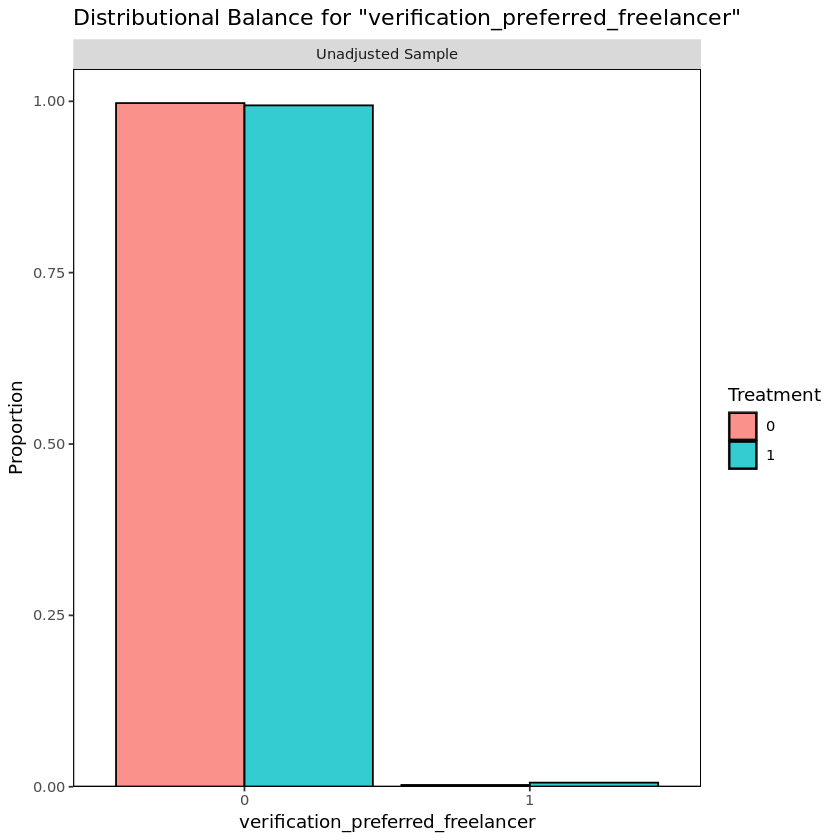

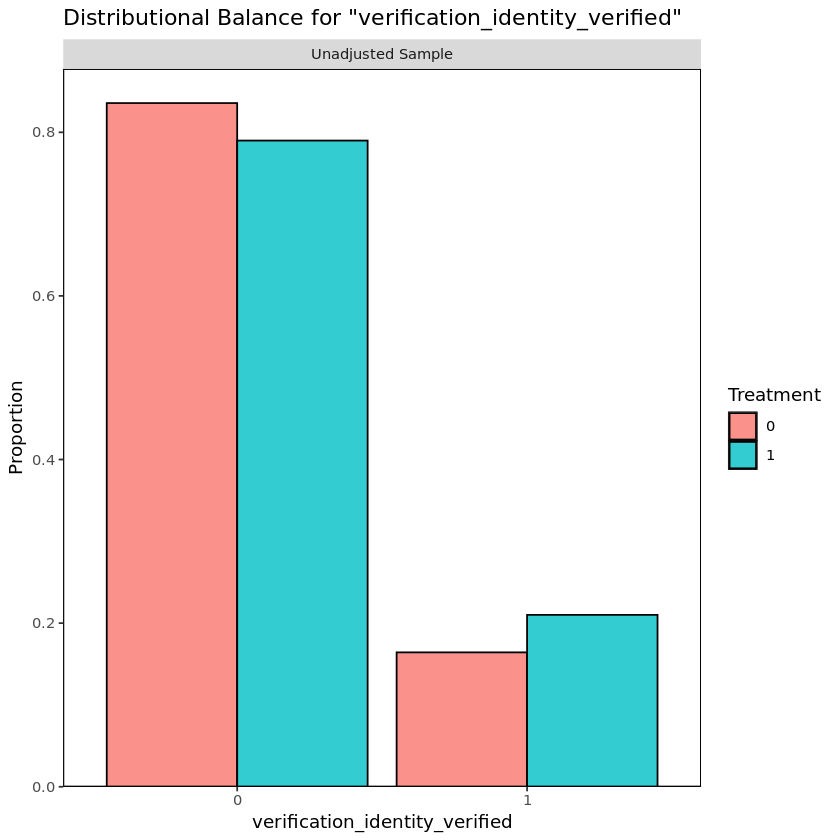

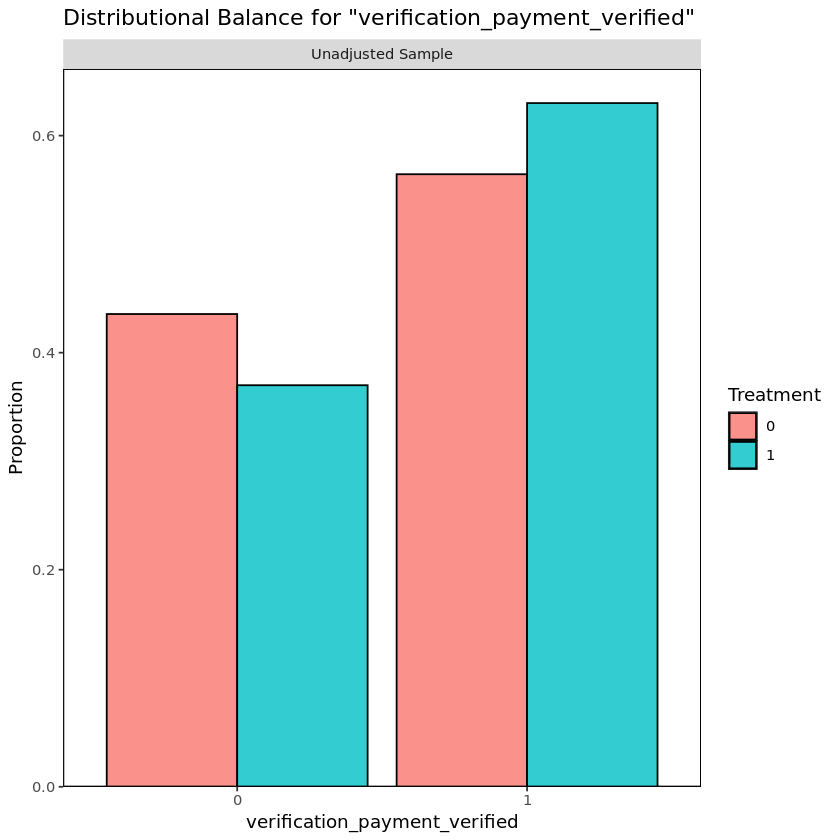

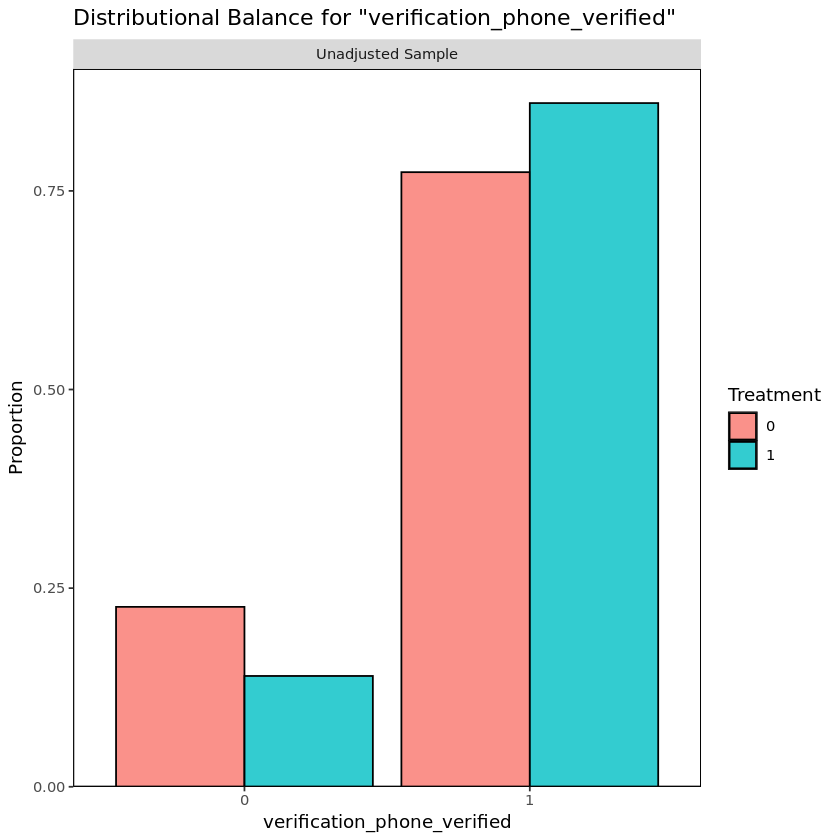

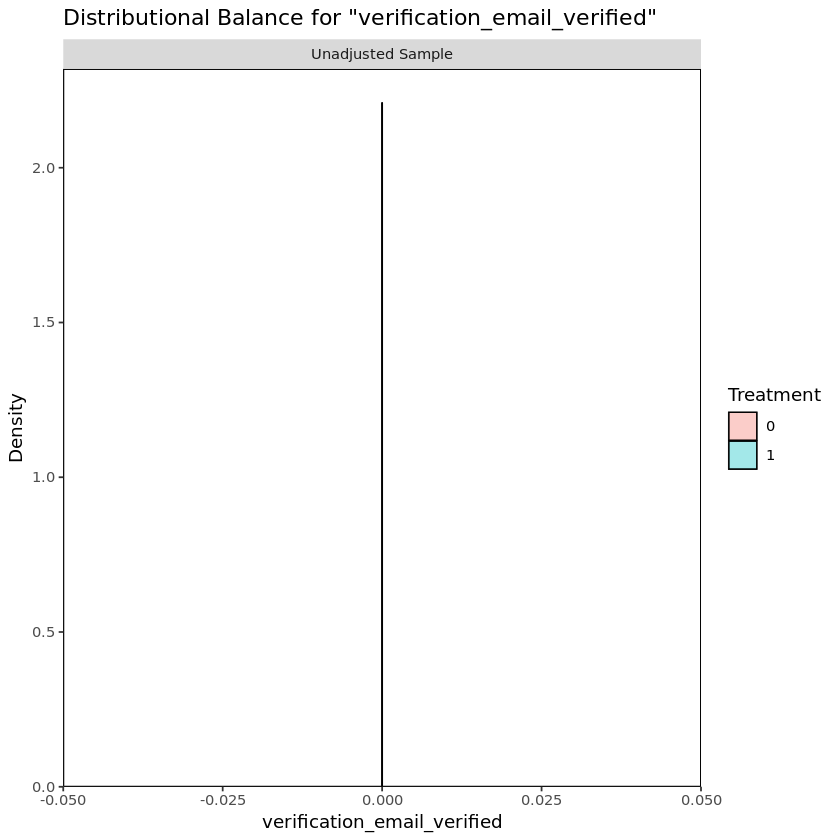

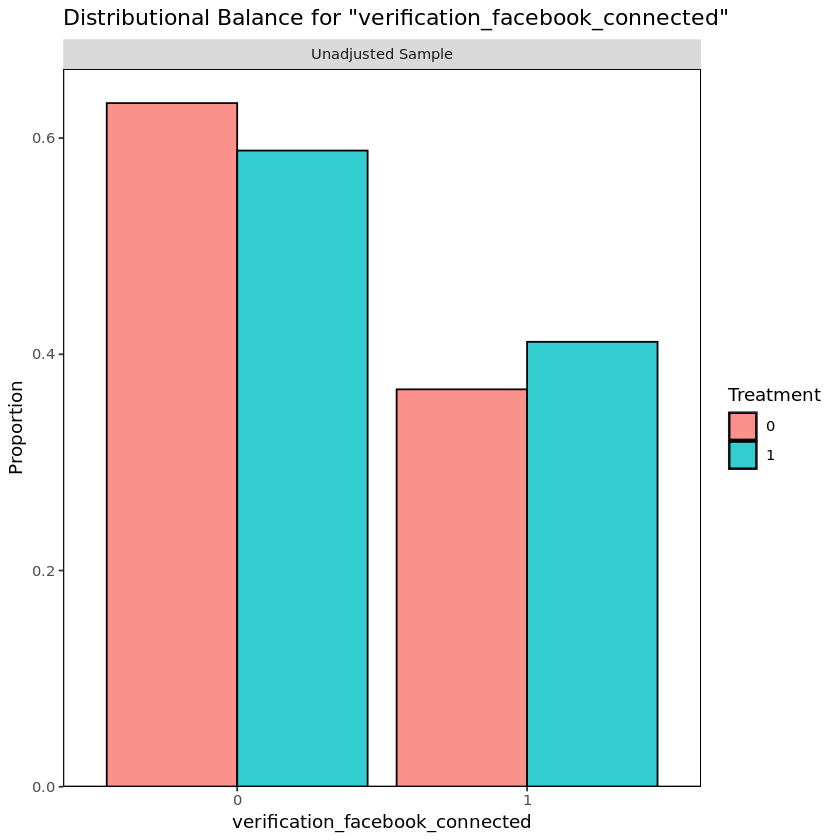

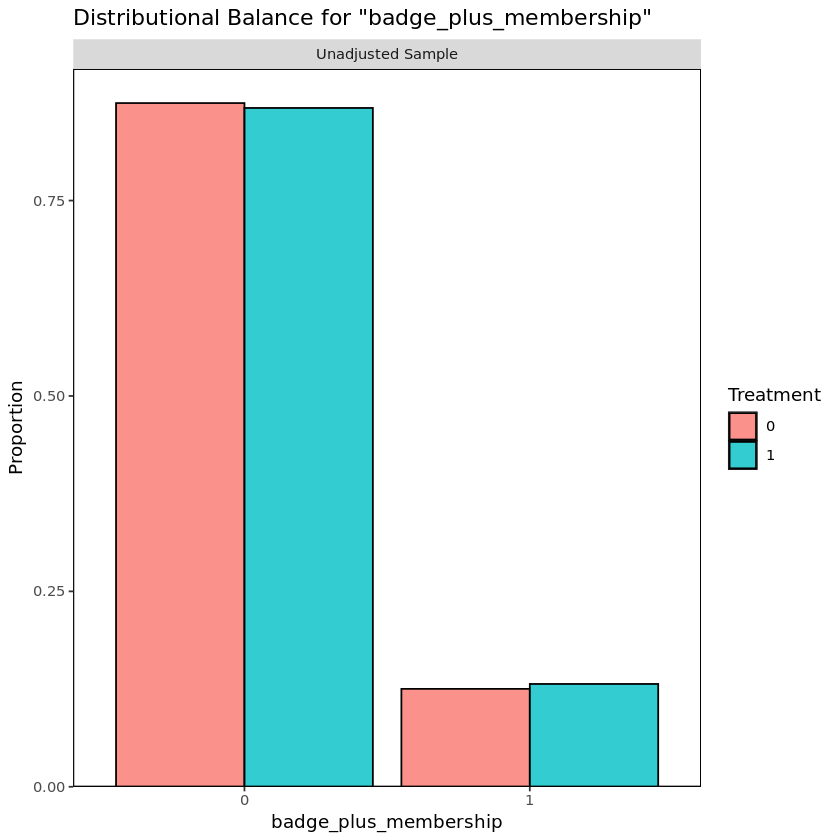

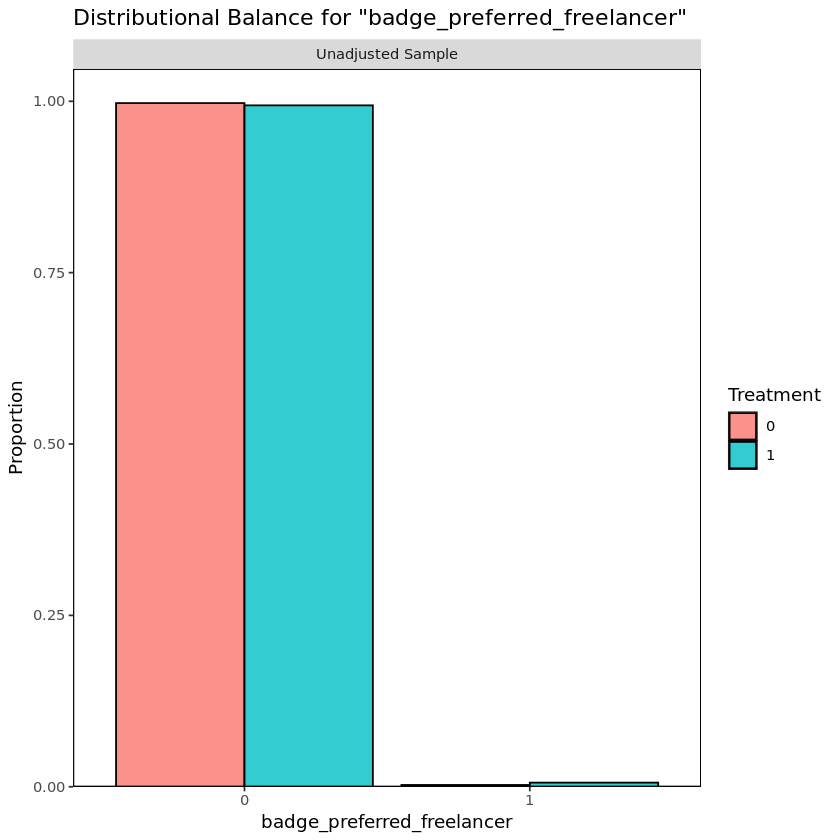

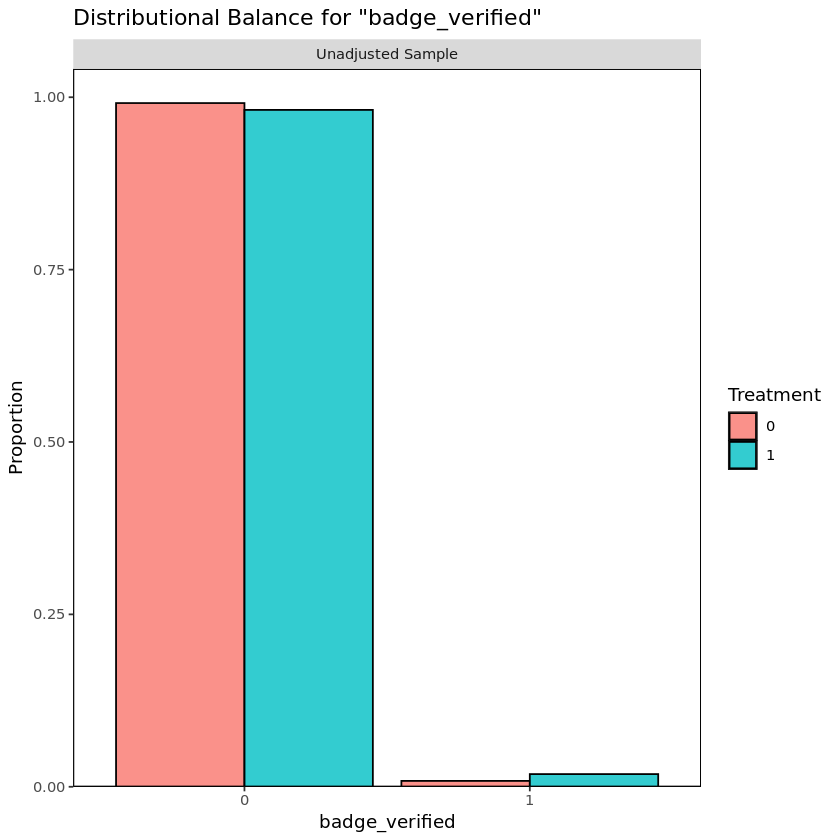

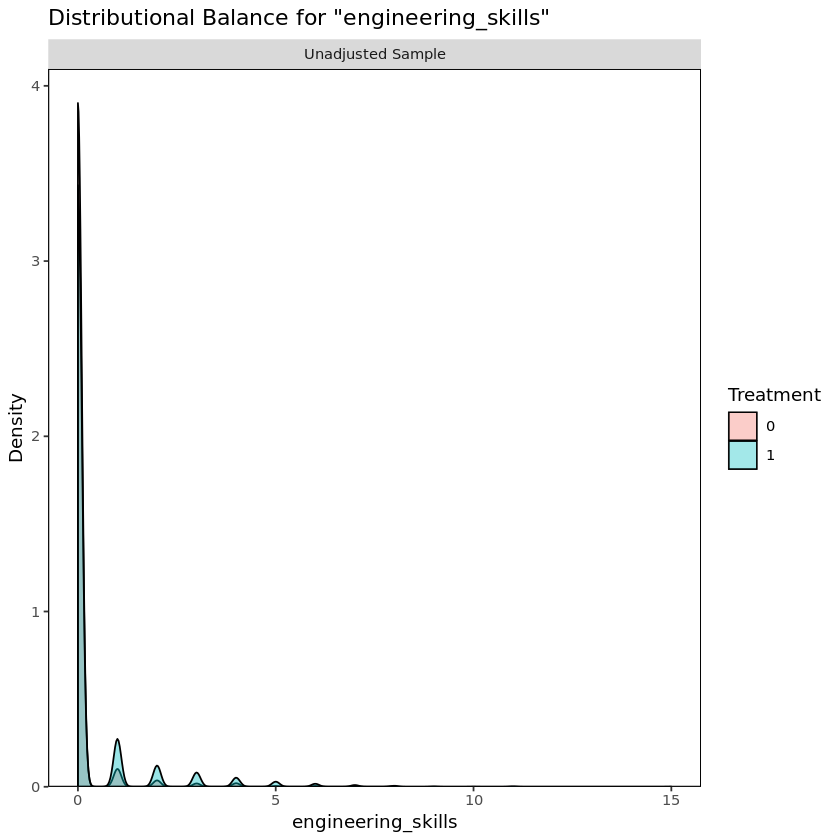

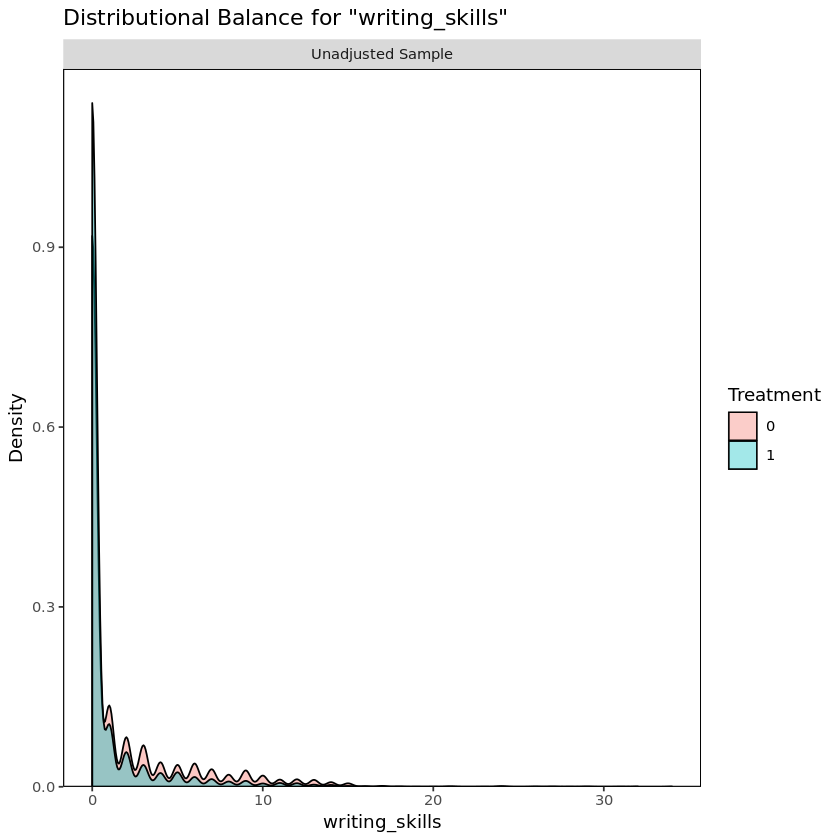

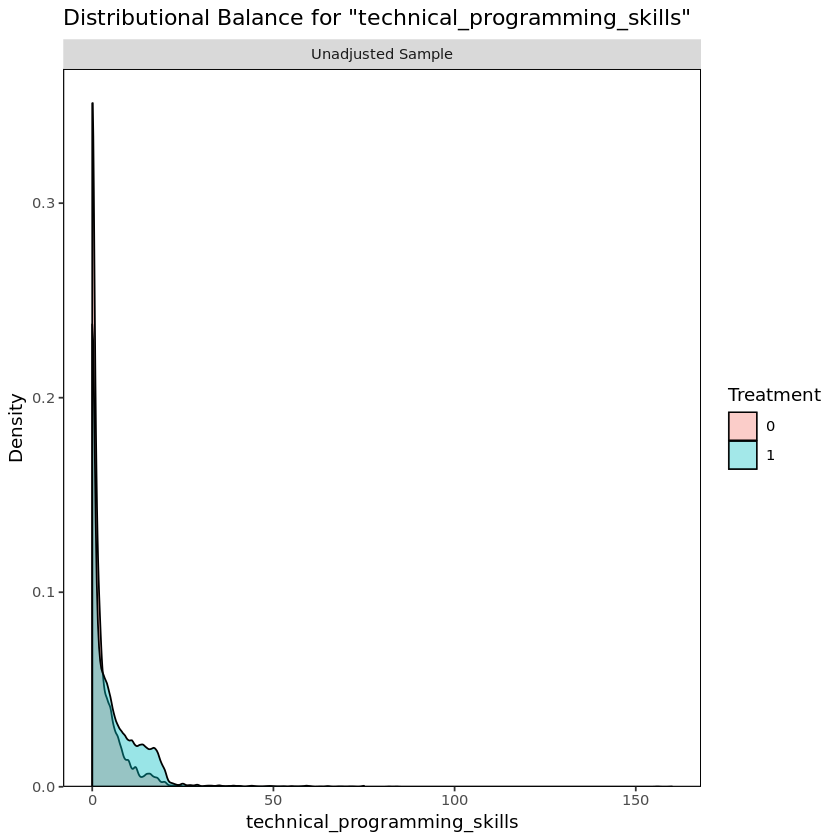

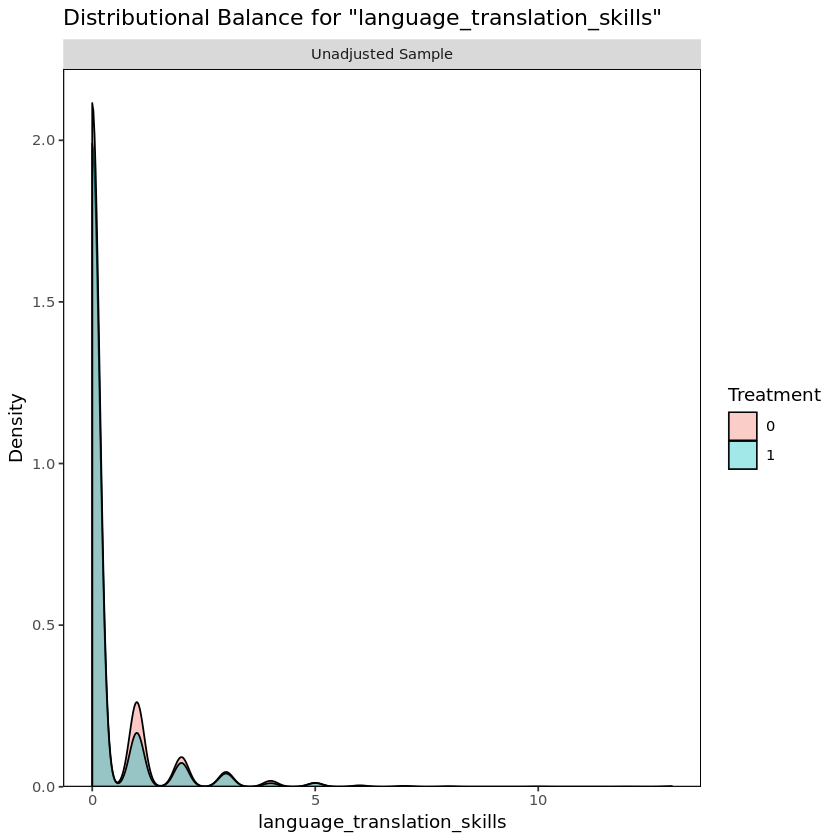

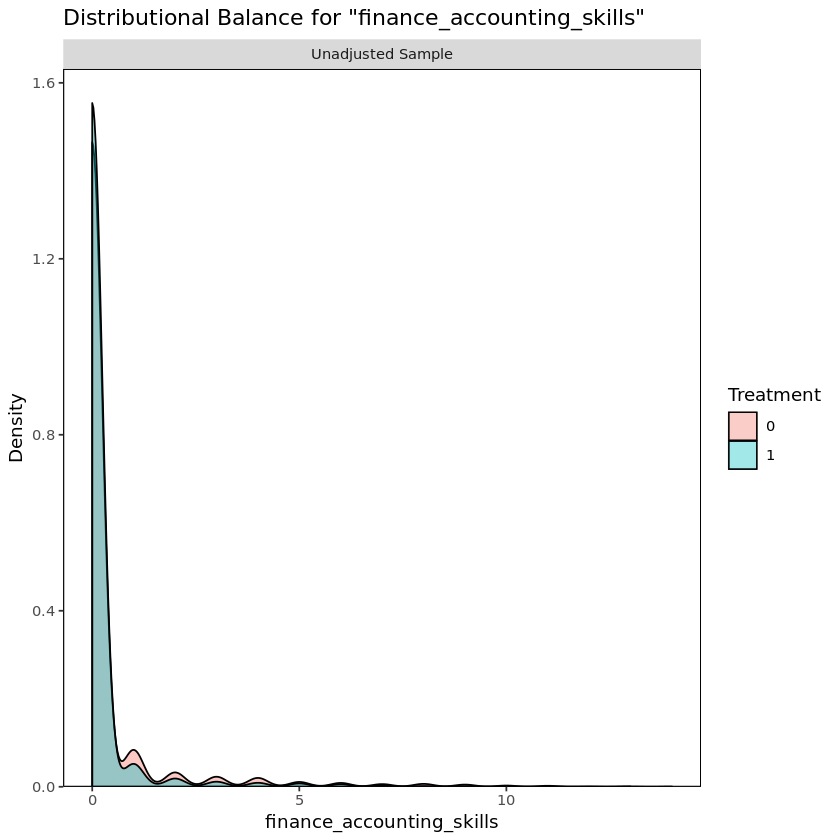

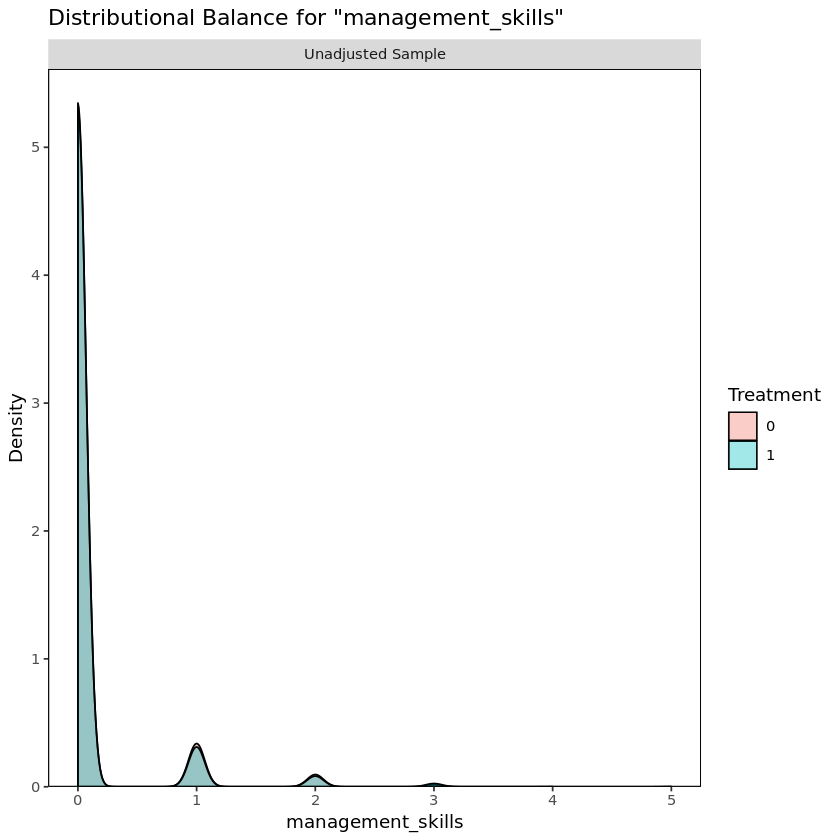

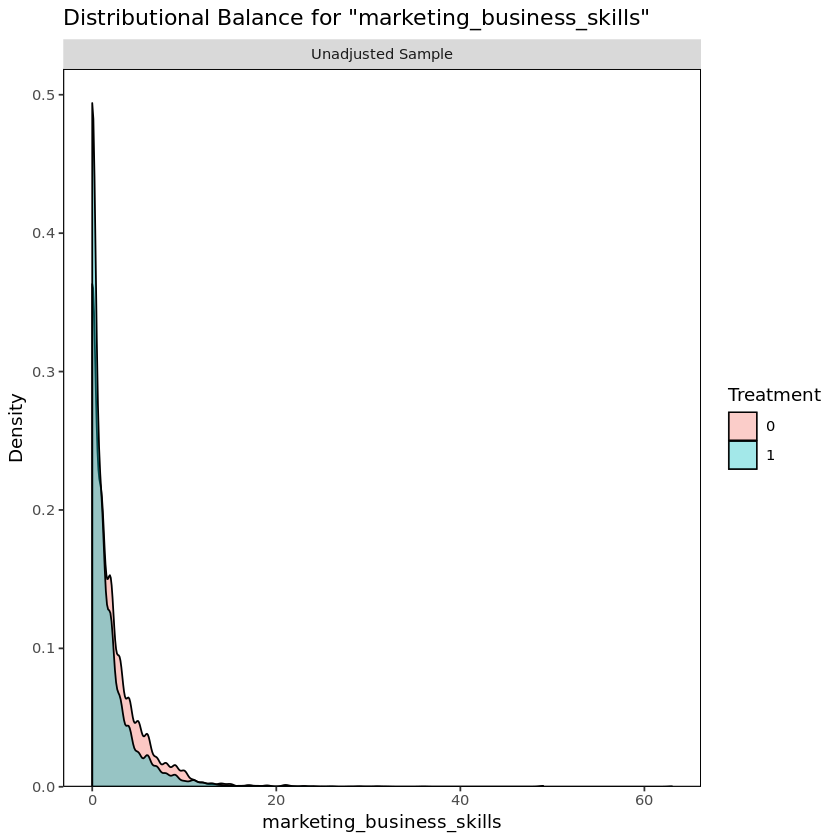

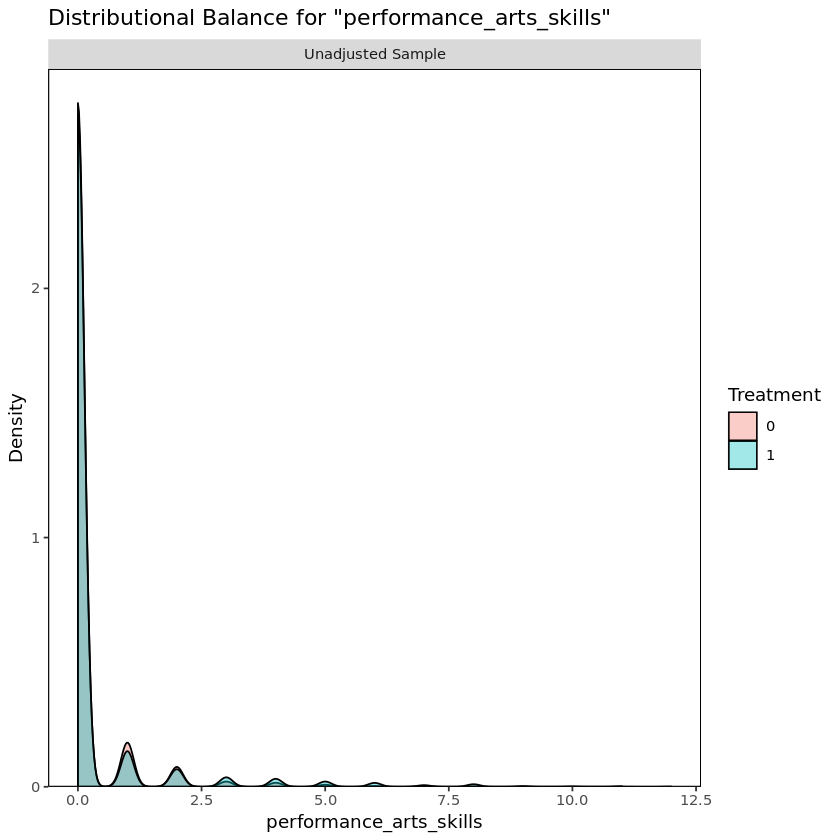

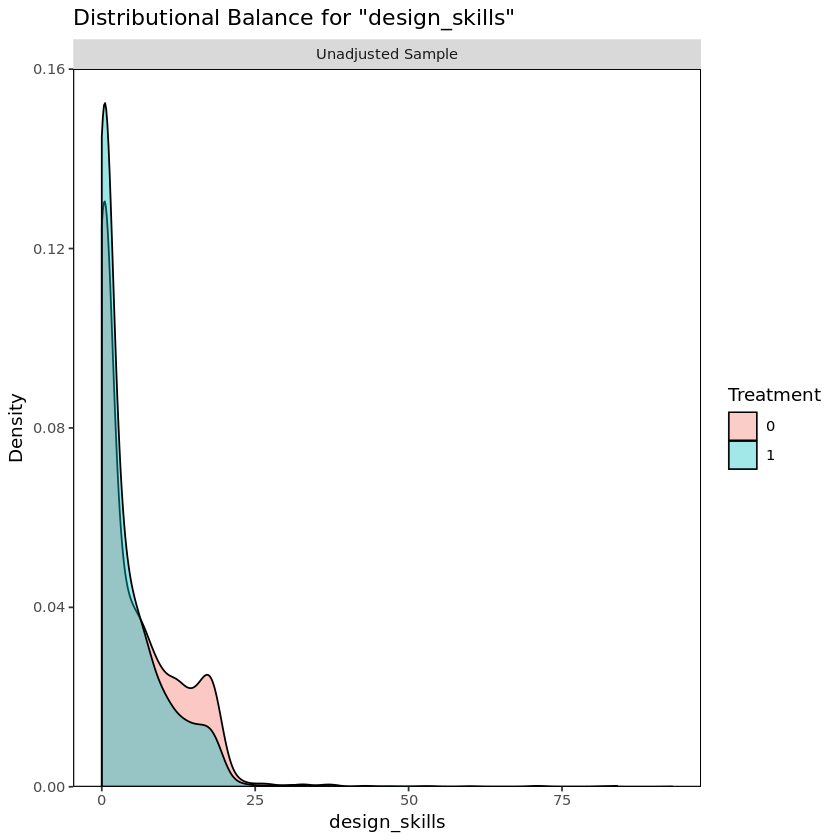

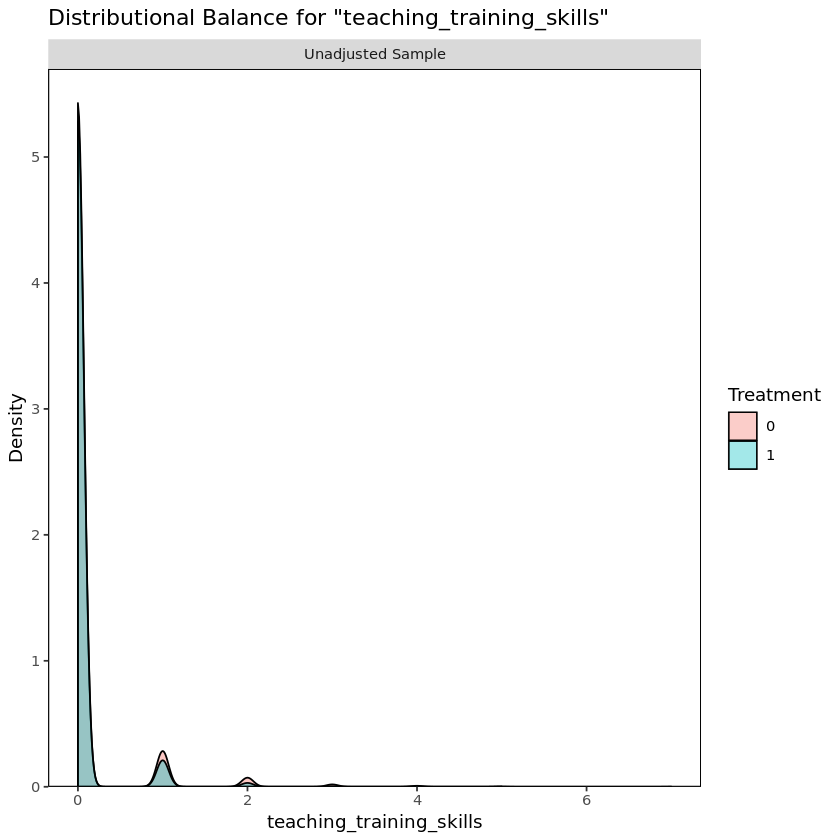

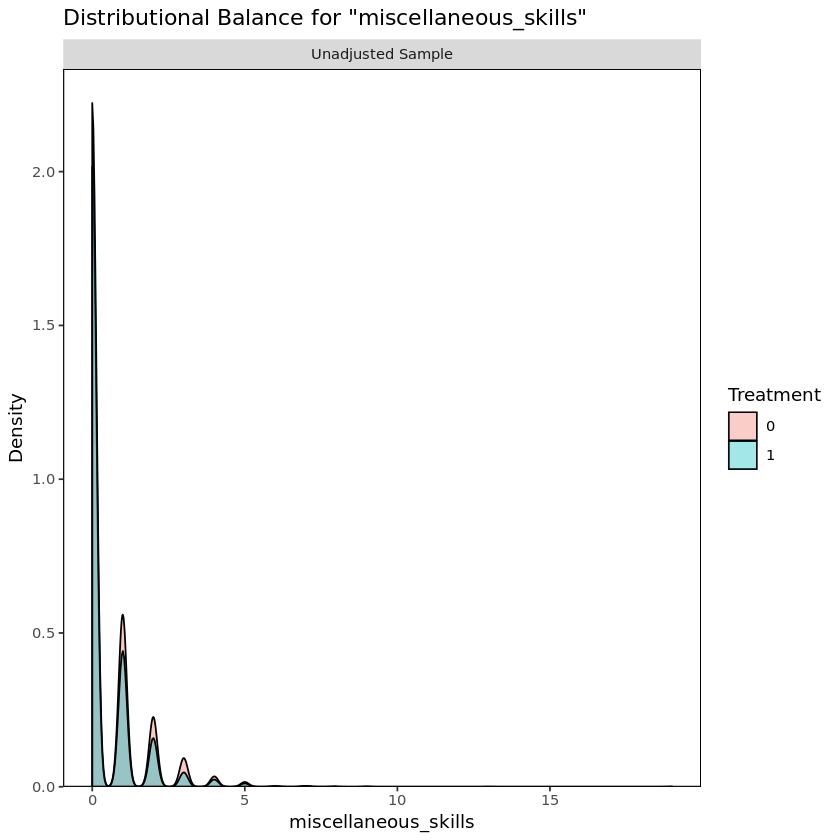

ERROR: Error: "general_skills_certifications" is not the name of an available covariate.


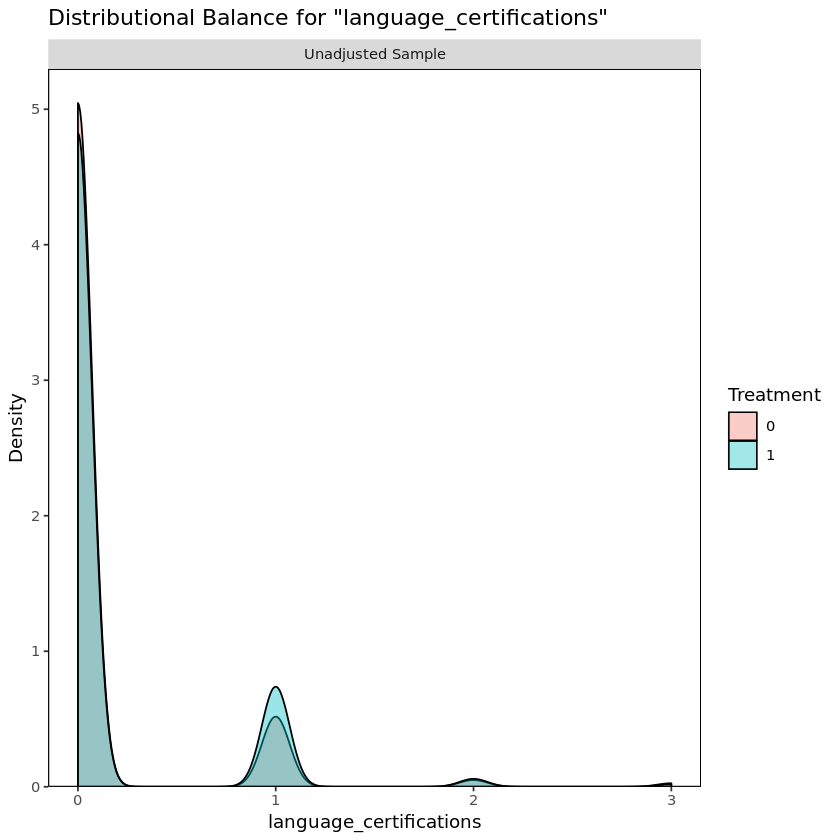

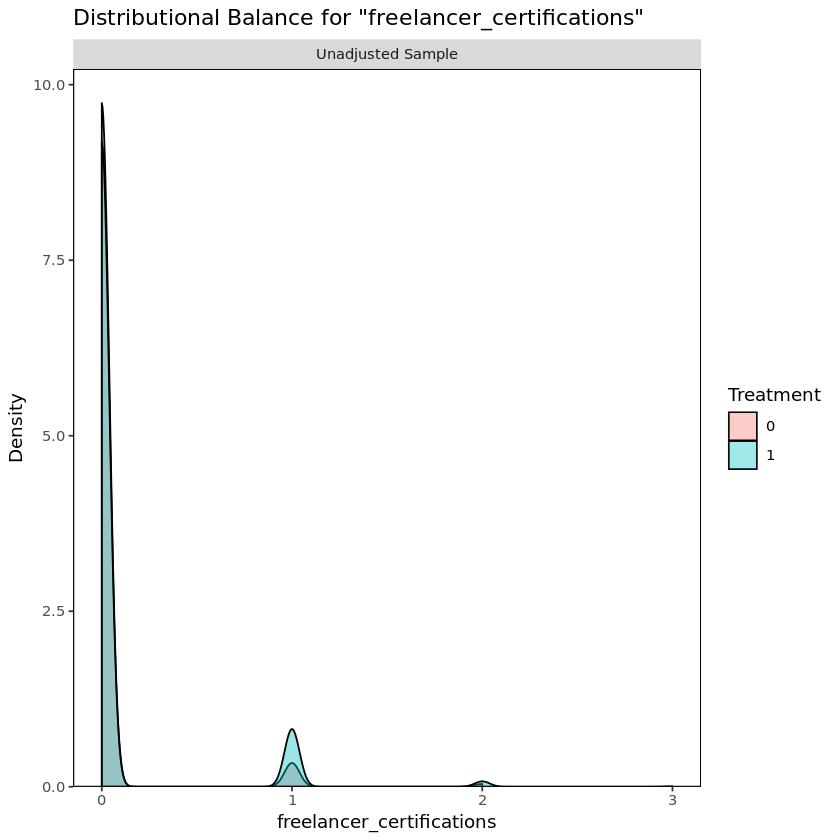

In [ ]:
# covariate balance plots

covariates = c('join_date_from_earliest', 'location_size', 'avg_rating', 'num_reviews', 'num_recommendations', 'pct_jobs_completed', 'pct_on_budget', 'pct_on_time', 'verification_preferred_freelancer', 'verification_identity_verified', 'verification_payment_verified', 'verification_phone_verified', 'verification_email_verified', 'verification_facebook_connected', 'badge_plus_membership', 'badge_preferred_freelancer', 'badge_verified', 'engineering_skills', 'writing_skills', 'technical_programming_skills', 'language_translation_skills', 'finance_accounting_skills', 'management_skills', 'marketing_business_skills', 'performance_arts_skills', 'design_skills', 'teaching_training_skills', 'miscellaneous_skills', 'language_certifications', 'freelancer_certifications', 'general_skills_certifications', 'programming_certifications')

for (c in covariates) {
    print(bal.plot(gender ~ join_date_from_earliest + location_size + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified + engineering_skills + writing_skills + technical_programming_skills + language_translation_skills + finance_accounting_skills + management_skills + marketing_business_skills + performance_arts_skills + design_skills + teaching_training_skills + miscellaneous_skills + language_certifications + freelancer_certifications + general_skill_certifications + programming_certifications, data=df, var.name=c))
}  

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=acc27b92-84be-4130-8026-204943f38189' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>